In [2]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

In [19]:
def model(t, X, param):
    Dc, Mc, Ma, Mn, A, Ca, Da = X
    lambda_ =param["lambda"]
    d0 =param["d0"]
    d1 =param["d1"]
    a1 =param["a1"]
    a2 =param["a2"]
    b2 =param["b2"]
    n2 =param["n2"]
    a3 =param["a3"]
    b3 =param["b3"]
    n3 =param["n3"]
    a4 =param["a4"]
    a5 =param["a5"]
    b5 =param["b5"]
    n5 =param["n5"]
    e0 =param["e0"]
    e1 =param["e1"]
    e2 =param["e2"]
    e3 =param["e3"]
    e4 =param["e4"]
    e5 =param["e5"]
    e6 =param["e6"]
    cs = param["cs"]

    if 100 <= t <= 120:
        k = np.log(100) / (120 - 100)  
        Irr = 50 * np.exp(-k * (t - 100))
    else: Irr = 0
    if t >=100: 
        Aox=1
        Sta=1
    else:
        Aox=0
        Sta=0
    f3=1
    
    s = np.sin(2*np.pi*0.1*t)+1.1+Irr

    k1 = a1/(1+e1*Aox);
    k2 = b2*a2**n2/(a2**n2+Da**n2)/(1+e2*Aox);
    k3 = b3*a3**n3/(a3**n3+Da**n3)*(1+e3*Aox)*(1+f3*Sta);
    k4 = a4/(1+e4*Aox);
    k5 = a5*Ca**n5/(b5**n5+Ca**n5)/(1+e5*Aox);
    k6 = e6*Aox; 

    dDc_dt = lambda_-d0*Dc+0.5*k1*Mc**2-s*Dc
    dMc_dt = -k1*Mc**2-k2*Mc+k6*Ma+2*s*Dc
    dMa_dt = k2*Mc-k3*Ma-k4*A*Ma-k5*Ma**2-k6*Ma+2*s*Da+s*Ca
    dMn_dt = k3*Ma-d1*Mn
    dA_dt  = -k4*Ma*A+s*Ca
    dCa_dt = k4*Ma*A-s*Ca
    dDa_dt = 0.5*k5*Ma**2-s*Da

    return np.array([dDc_dt, dMc_dt, dMa_dt, dMn_dt, dA_dt, dCa_dt, dDa_dt])   

In [20]:
param = {
    "lambda": 15,
    "d0": 0.05,
    "d1": 0.3,
    "a1": 0.01,
    "a2": 400,
    "b2": 0.4,
    "n2": 15,
    "a3": 80,
    "b3": 0.5,
    "n3": 5,
    "a4": 0.05,
    "a5": 0.4,
    "b5": 150,
    "n5": 15,
    "e0": 20,
    "e1": 20,
    "e2": 20,
    "e3": 0.5,
    "e4": 20,
    "e5": 20,
    "e6": 0.5,
    "cs": 0.002, 
}

initial_conditions = np.array([300, 0, 0, 0, 200, 0, 0])  # [Dc0, Mc0, Ma0, Mn0, A0, Ca0, Da0]

t_span = (0, 300) # Temps de 0 a 100
t_eval = np.linspace(t_span[0], t_span[1], 500)  # 500 points 

In [21]:
# Resoudre l ODE
solution = solve_ivp(model, t_span, initial_conditions, t_eval=t_eval, args=(param,), method="RK45")

t = solution.t
Dc, Mc, Ma, Mn, A, Ca, Da = solution.y
# C = Ma + Ca + 2*Da

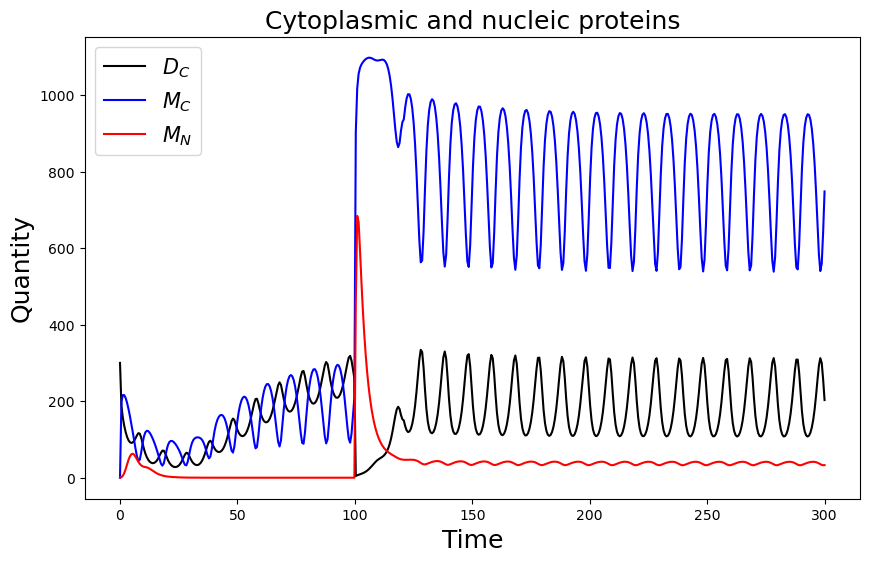

In [22]:
plt.figure(figsize=(10, 6))
plt.plot(t, Dc, 'k', label="$D_C$")
plt.plot(t, Mc, 'b', label="$M_C$")
plt.plot(t, Mn, 'r', label="$M_N$")
plt.xlabel("Time", fontsize=18)
plt.ylabel("Quantity", fontsize=18)
plt.title("Cytoplasmic and nucleic proteins", fontsize=18)
plt.legend(fontsize=15)
plt.show()

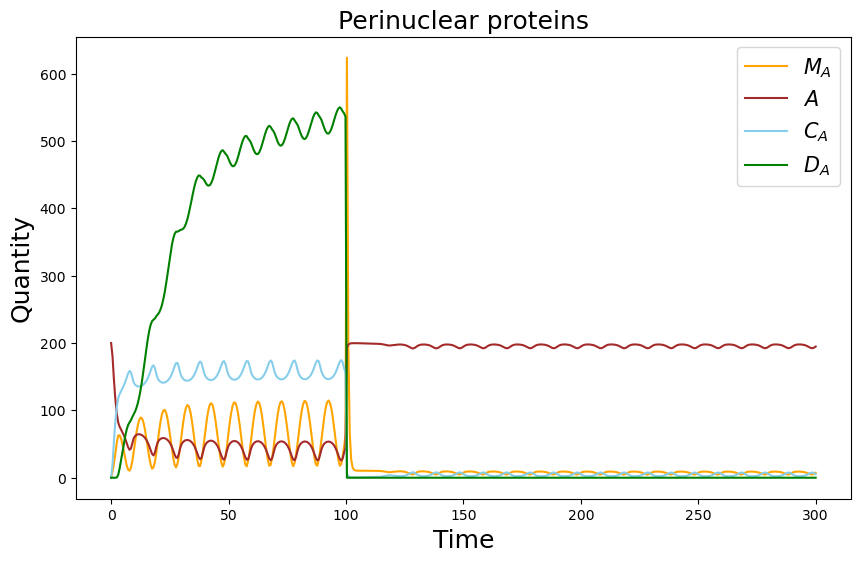

In [23]:
plt.figure(figsize=(10, 6))
plt.plot(t, Ma, 'orange', label="$M_A$")
plt.plot(t, A,  'brown', label="$A$")
plt.plot(t, Ca, 'skyblue', label="$C_A$")
plt.plot(t, Da, 'g', label="$D_A$")
# plt.plot(t, C, label="$C$")
plt.xlabel("Time", fontsize=18)
plt.ylabel("Quantity", fontsize=18)
plt.title("Perinuclear proteins", fontsize=18)
plt.legend(fontsize=15)
plt.show()